# Data Description

#  Based on 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of winsfor a given team inthe 2015 season based on several different indicators of success.

    '''1.win:(W):number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage) 
2. Runs:(R)- times reached home plate legally and safely
3. At Bats:(AB) -plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or      obstruction
4. Hits: (H)- reaching base because of a batted, fair ball without error by the defense   
5. Doubles: (2B)- hits on which the batter reaches second base safely without the contribution of a fielding error
6. Triples: (3B)- hits on which the batter reaches third base safely without the contribution of a fielding error
7. Homeruns: (HR)- at bats divided by home runs
8. Walks:(BB) - Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone    and awarded first base.
9. Strikeouts:(SO)- number of batters who received strike three
10. Stolen Bases:(SB)- number of bases advanced by the runner while the ball is in the possession of the defense
11. Runs Allowed:(RA)- Run average,number of runs allowed times nine divided by innings pitched
12. Earned Runs:(ER)-number of runs that did not occur as a result of errors or passed balls
13. Earned Run Average (ERA): total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
14. Shutouts:(SHO)-number of complete games pitched with no runs allowed
15. Saves:(SV)- number of games where the pitcher enters a game led by the pitcher's team, finishes the game without  surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher  entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
16. Complete Games:(CG)-  number of games where player was the only pitcher for their team
17. Errors(E)- number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result


Based on the the other 16 features our target feature is win(W)'''

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# import the dataset

data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
# see all the rows and columns

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
# See the first 5 rows
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
# See the total no.of columns
data.shape

(30, 17)

In [6]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Finding for missing values

In [8]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Its clear that the dataset does not have any null values 

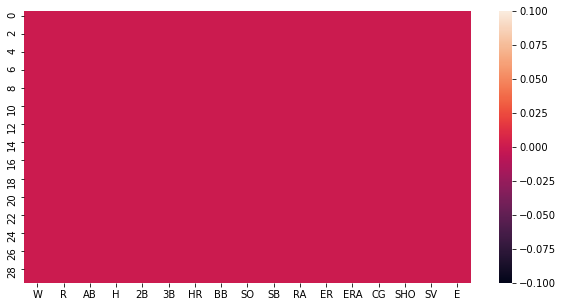

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())
plt.show()

In [10]:
# Look at the information like datatypes specially
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# The above shows all the features in the dataset are numerical in nature

In [11]:
# Finding the correlation of features
data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


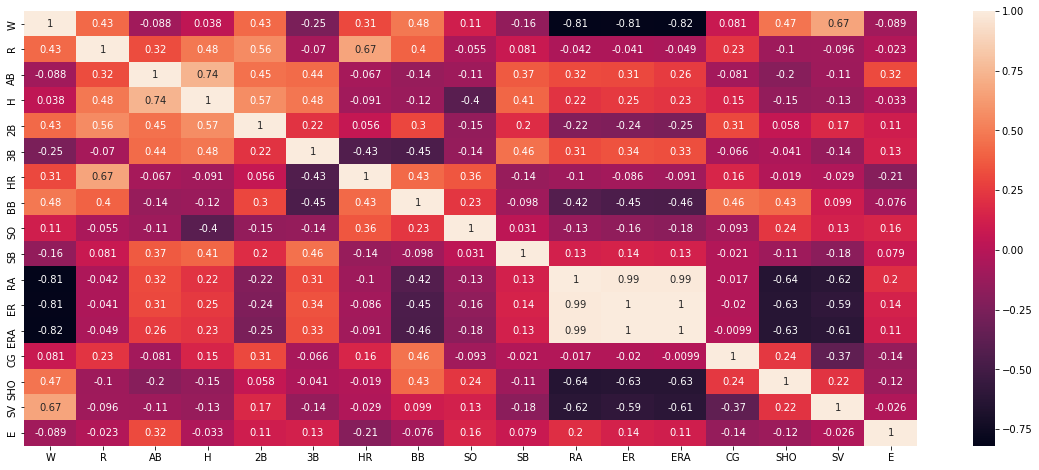

In [12]:
# Plot a heat map 
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

#  Observation: 
'''1. Win is correlated to Saves

2. Run average(RA) is highly correlated to Earned run Average(ERA)
3. Run average(RA) is highly correlated to Earned Run(ER)
4. At bat (AB) is highly related  to Hit(H)
5. HOmeRuns (HR) is correlated to Run(R)
6. Saves(SV) is correlated to Win'''

# Exploratory Data Analysis

<Figure size 864x720 with 0 Axes>

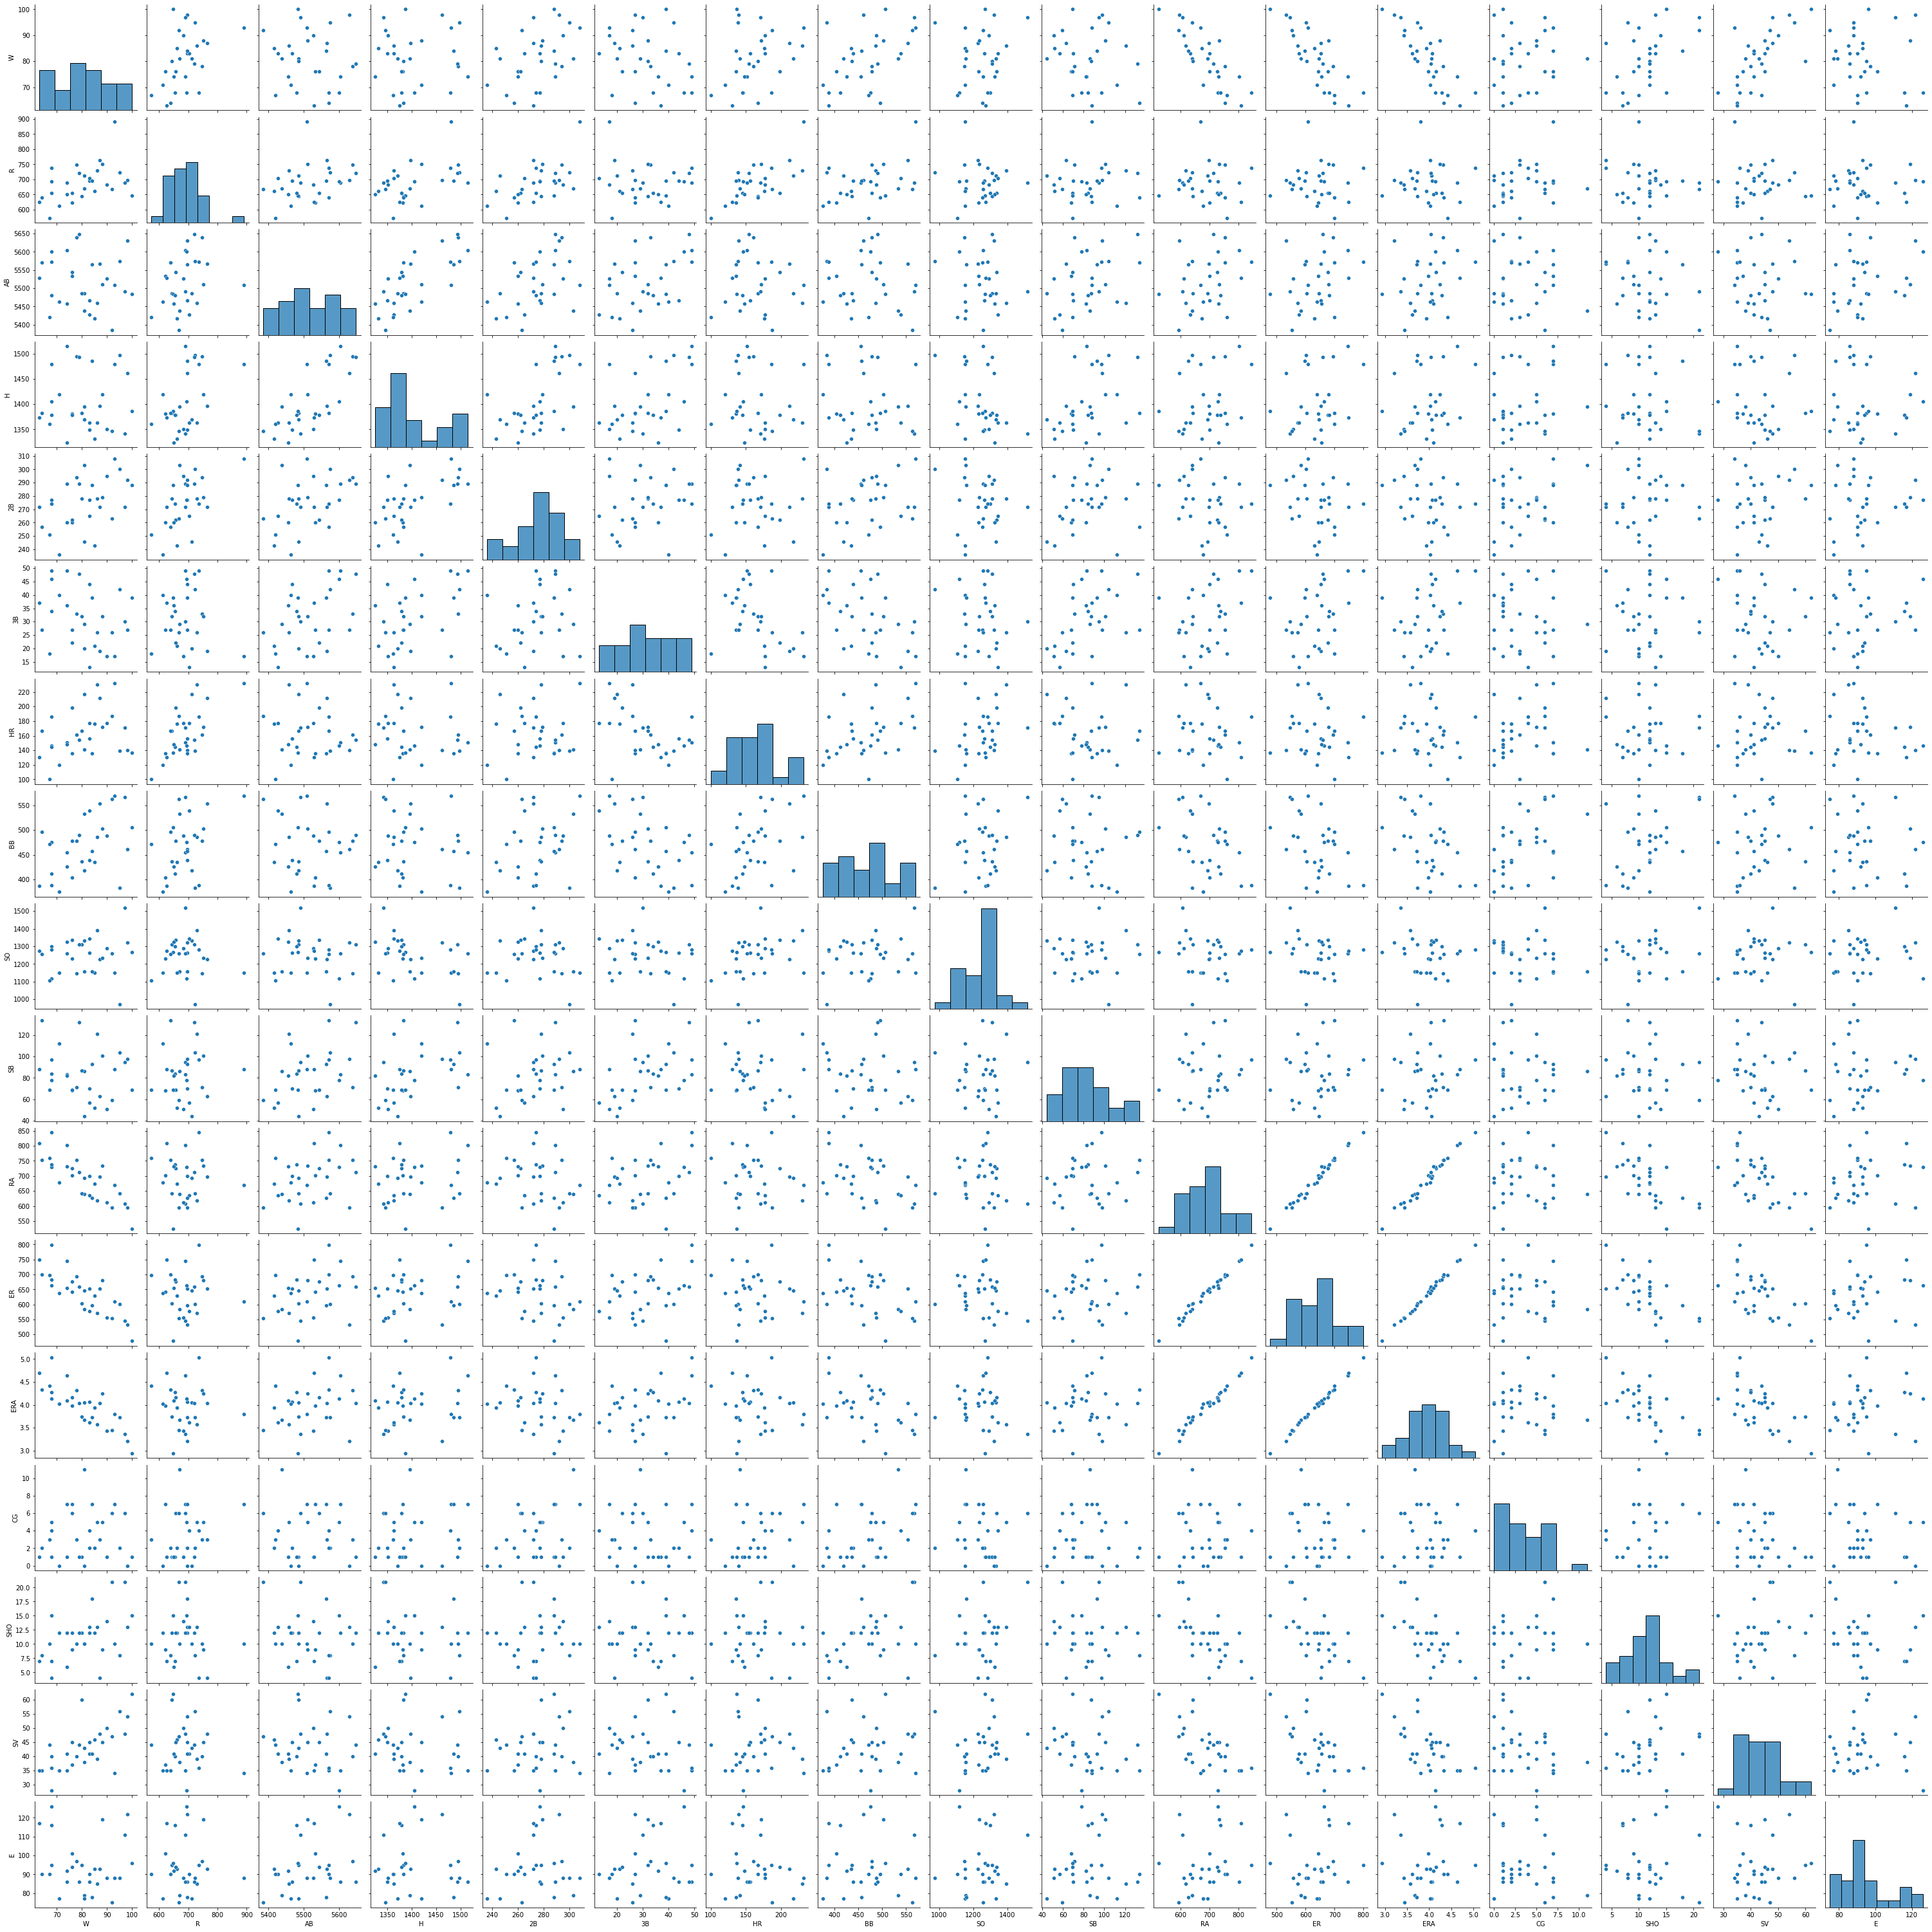

In [13]:
# Plotting  pairwise to visualize the relationship  among the features in  the dataset

plt.figure(figsize=(12,10))

sns.pairplot(data)
plt.show()

In [14]:
# The dataset seems to be almost normalised except few


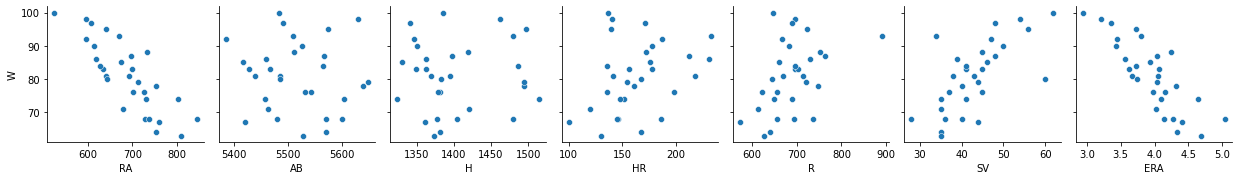

In [15]:
sns.pairplot(data,x_vars=['RA','AB','H','HR','R','SV','ERA'],y_vars='W',kind='scatter')
plt.show()

In [16]:
# RA and ERA is negetively linear correlated

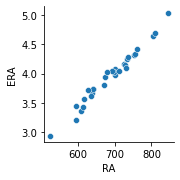

In [17]:
sns.pairplot(data,x_vars='RA',y_vars='ERA',kind='scatter')
plt.show()

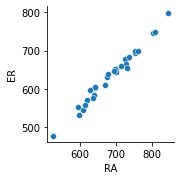

In [18]:
sns.pairplot(data,x_vars='RA',y_vars='ER',kind='scatter')
plt.show()

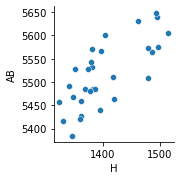

In [19]:
sns.pairplot(data,x_vars='H',y_vars='AB',kind='scatter')
plt.show()

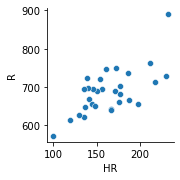

In [20]:
sns.pairplot(data,x_vars='HR',y_vars='R',kind='scatter')
plt.show()

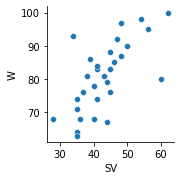

In [21]:
sns.pairplot(data,x_vars='SV',y_vars='W',kind='scatter')
plt.show()

# Observation: All the above plot shows the data is linearly Correalation 


In [22]:
# lets see the relation between win with respect to the other features

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

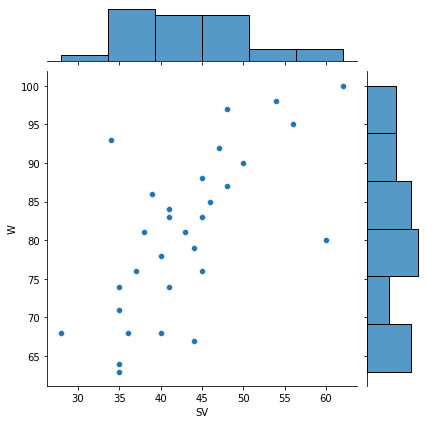

In [23]:
sns.jointplot(data.SV,data.W,kind='scatter')
plt.show

# From the all above plots its clearly visible thae it is the problem of Linear Regression

# Lets check for dependency of Win with all the features

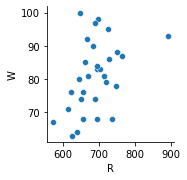

In [25]:
# Relation of Win with Run

sns.pairplot(data,x_vars='R',y_vars='W',kind='scatter')
plt.show()

# Shows mild linear relation

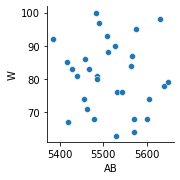

In [26]:
# Relation on Win with AB

sns.pairplot(data,x_vars='AB',y_vars='W',kind='scatter')
plt.show()
# Shows no relation

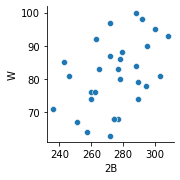

In [27]:
# 

sns.pairplot(data,x_vars='2B',y_vars='W',kind='scatter')
plt.show()
# Linearly dependent

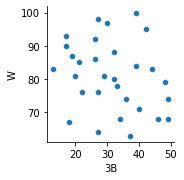

In [28]:
sns.pairplot(data,x_vars='3B',y_vars='W',kind='scatter')
plt.show()

# No relationship

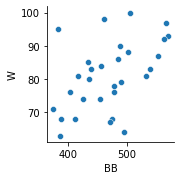

In [29]:
sns.pairplot(data,x_vars='BB',y_vars='W',kind='scatter')
plt.show()
# Slightly Linearly related

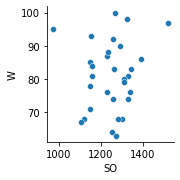

In [30]:
sns.pairplot(data,x_vars='SO',y_vars='W',kind='scatter')
plt.show()

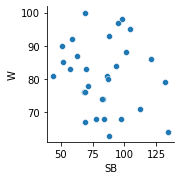

In [31]:
sns.pairplot(data,x_vars='SB',y_vars='W',kind='scatter')
plt.show()
# No relationship

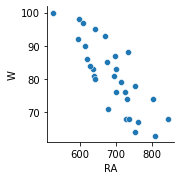

In [32]:
sns.pairplot(data,x_vars='RA',y_vars='W',kind='scatter')
plt.show()
# Negetively  linearly correlated

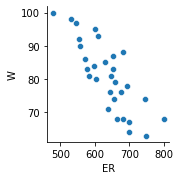

In [33]:
sns.pairplot(data,x_vars='ER',y_vars='W',kind='scatter')
plt.show()
# Negetively  linearly correlated

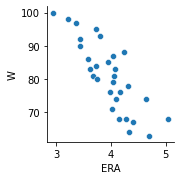

In [34]:
sns.pairplot(data,x_vars='ERA',y_vars='W',kind='scatter')
plt.show()
# Negetively  linearly correlated

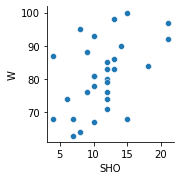

In [35]:
sns.pairplot(data,x_vars='SHO',y_vars='W',kind='scatter')
plt.show()

# Model Building

In [60]:
x=data['SV']# independent variable
y=data['W']# dependent variable

In [61]:
# has to reshape the x variable as getting data in 1D array
x=np.array(x)
x=x.reshape(-1,1)

In [62]:
# Spliting the dataset

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [64]:
print('X-train shape:',x_train.shape)
print('Y-train shape:',y_train.shape)
print('X-test shape:',x_test.shape)
print('Y-test shape:',y_test.shape)

X-train shape: (21, 1)
Y-train shape: (21,)
X-test shape: (9, 1)
Y-test shape: (9,)


# Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

In [66]:
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [67]:
print('Linear Coefficients:',lm.coef_)
print('Linear intercept:',lm.intercept_)

Linear Coefficients: [0.88540352]
Linear intercept: 42.83528844012176


In [70]:
# Model Prediction
y_pred=lm.predict(x)
y_pred

array([92.41788551, 82.6784468 , 76.48062217, 75.59521865, 73.82441161,
       72.93900809, 85.33465736, 80.90763977, 95.95949959, 78.25142921,
       82.6784468 , 77.36602569, 83.56385032, 82.6784468 , 67.62658698,
       97.73030663, 90.64707848, 85.33465736, 78.25142921, 73.82441161,
       87.1054644 , 79.13683273, 73.82441161, 81.79304328, 73.82441161,
       84.44925384, 79.13683273, 81.79304328, 79.13683273, 74.70981513])

In [71]:
# RMSE
from sklearn.metrics import mean_squared_error
print('MeanSqErr_LR:',mean_squared_error(y, y_pred,squared=False))

MeanSqErr_LR: 7.661844956775007


In [73]:
# R-squared
from sklearn.metrics import r2_score
print('r2_score_LR:',r2_score(y, y_pred))

r2_score_LR: 0.4442617327678554


In [74]:
# Cross validating 
from sklearn.model_selection import cross_val_predict
scores=cross_val_predict(lm,data,y,cv=6)
print ('Cross validate score:',scores)


Cross validate score: [ 95.  83.  81.  76.  74.  93.  87.  81.  80.  78.  88.  86.  85.  76.
  68. 100.  98.  97.  68.  64.  90.  83.  71.  67.  63.  92.  84.  79.
  74.  68.]


# Multi Linear Regression

In [75]:
# Dividing features in x and y
x=data[['R','2B','BB','SO','SV']]  # independent variables
y=data['W']      # Dependent variable

In [76]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1,random_state=42)

In [77]:
lm1=LinearRegression()
lm1.fit(x,y)

LinearRegression()

In [78]:
print('Linear Coefficients:',lm1.coef_)
print('Linear intercept:',lm1.intercept_)

Linear Coefficients: [ 0.06754845  0.01069047  0.04787945 -0.00110145  0.89711333]
Linear intercept: -28.180558813675376


In [79]:
# Model Prediction
y_pred1=lm1.predict(x[['R','2B','BB','SO','SV']])
y_pred1

array([91.43612667, 81.7913695 , 78.58424355, 67.79470643, 73.24726109,
       91.8231477 , 94.56944231, 79.73479638, 91.55193523, 82.99512723,
       88.62634511, 80.75782737, 79.89485856, 80.71706834, 68.28871649,
       97.05463575, 91.0827587 , 89.80521893, 73.17294893, 71.56275502,
       87.90868997, 83.24729855, 63.83668591, 74.01291423, 65.53764621,
       87.42068478, 79.29799375, 85.03268696, 74.22212507, 73.99198528])

In [80]:
# RMSE
from sklearn.metrics import mean_squared_error
print('MeanSqErr_MLR:',mean_squared_error(y, y_pred1,squared=False))


MeanSqErr_MLR: 5.17003586734916


In [81]:
# R-squared
from sklearn.metrics import r2_score
print('r2_score_LR:',r2_score(y, y_pred1))

r2_score_LR: 0.7469591161923539


# Random Forest

In [84]:

from sklearn.ensemble import RandomForestRegressor

In [85]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [86]:
# Model Prediction
y_pred2=rf.predict(x_train)
y_pred2

array([93.27, 81.03, 80.55, 74.63, 66.35, 82.68, 91.66, 74.18, 93.22,
       87.76, 78.25, 83.45, 69.63, 83.43, 82.02, 89.97, 72.48, 83.36,
       81.77, 71.04, 72.46, 89.78, 80.64, 86.22, 71.3 , 68.7 , 89.27])

In [87]:
# RMSE
from sklearn.metrics import mean_squared_error
print('MeanSqErr_MLR:',mean_squared_error(y_train, y_pred2,squared=False))

MeanSqErr_MLR: 2.767975593983604


In [88]:
# R-squared
from sklearn.metrics import r2_score
print('r2_score_LR:',r2_score(y_train, y_pred2))


r2_score_LR: 0.9206623409090909


In [90]:
rmse_compilation= {'model':['linear regression', 'MultiLinear regression','Random Forest'],
    'RMSE':[7.661844956775007, 5.17003586734916, 2.767975593983604]}
rmse_df=pd.DataFrame(data=rmse_compilation)
rmse_df.sort_values(by=['RMSE'], ascending=False)

,model,RMSE
0,linear regression,7.661845
1,MultiLinear regression,5.170036
2,Random Forest,2.767976


# As per above table its clearly visble that Random Forest is having minimum RMSE

# Cross Validating the Models

# Linear Regression

In [91]:

from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict
lm=LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm,n_features_to_select=10)
rfe=rfe.fit(x_train,y_train)

In [92]:
y_pred_cv=rfe.predict(x_test)

In [93]:
print('MeanSqErr_LR_cv:',mean_squared_error(y_test, y_pred_cv,squared=False))
print('r2_score_cv:',r2_score(y_test,y_pred_cv))

MeanSqErr_LR_cv: 6.59465261353467
r2_score_cv: 0.7661857898215072


#  Multilinear Regression

In [94]:

from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict
lm1=LinearRegression()
lm1.fit(x_train,y_train)
rfe1=RFE(lm1,n_features_to_select=6)
rfe1=rfe1.fit(x_train,y_train)

In [95]:
y_pred1_cv=rfe1.predict(x_test)

In [96]:
print('MeanSqErr_MLR_cv:',mean_squared_error(y_test, y_pred1_cv,squared=False))
print('r2_score_cv:',r2_score(y_test,y_pred1_cv))

MeanSqErr_MLR_cv: 6.59465261353467
r2_score_cv: 0.7661857898215072


# Random forest

In [103]:
from sklearn.model_selection import GridSearchCV
rf= RandomForestRegressor()
parameters = {'n_estimators':[int(x) for x in np.linspace(100,1000,10)]}
rf_regressor= GridSearchCV(rf, parameters, scoring='neg_mean_squared_error')
rf_regressor.fit(x_train, y_train.ravel())
print(rf_regressor.best_params_)
print(-rf_regressor.best_score_)

{'n_estimators': 700}
62.91252346938776


In [104]:
rf_reg= RandomForestRegressor(n_estimators=700)
rf_reg.fit(x_train, y_train.ravel())
rf_reg_pred = rf_reg.predict(x_test)


# test RMSE
#test_rmse = mean_squared_error(y_test, rf_reg_pred, squared= False)
#print(f'Test RMSE: {test_rmse}')
print('MeanSqErr_RF_cv:',mean_squared_error(y_test, rf_reg_pred,squared=False))
print('r2_score_cv:',r2_score(y_test,rf_reg_pred))

MeanSqErr_RF_cv: 11.235861773621034
r2_score_cv: 0.3212656462585033


In [108]:
rmse_compilation_CV= {'model_CV':['linear regression', 'MultiLinear regression','Random Forest'],
    'RMSE_CV':[6.59465261353467, 6.59465261353467, 11.235861773621034]}
rmse_df=pd.DataFrame(data=rmse_compilation_CV)
rmse_df.sort_values(by=['RMSE_CV'], ascending=False)

,model_CV,RMSE_CV
2,Random Forest,11.235862
0,linear regression,6.594653
1,MultiLinear regression,6.594653


In [109]:
# As per above table its clearly visble that Linear and Multi Linear Regression is having minimum RMSE

# Hence we will go for either Linear Regression or MltiLinear Regression Model